In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_csv('aug_train.csv')
data_train,data_test = train_test_split(data,test_size=0.3)
data_test = pd.DataFrame(data=data_test,columns = data_train.columns)

In [35]:
import copy
df_train=copy.deepcopy(data_train)
df_test=copy.deepcopy(data_test)

cols=np.array(data_train.columns[data.dtypes != object])
all_columns = df_train.columns
for i in all_columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data_train.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)
# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols]=data[cols]

In [37]:
df_test = df_test.apply(lambda x: d[x.name].fit_transform(x))

In [38]:
df_train[cols]=data[cols]

In [39]:
df_test[np.delete(cols,len(cols)-1)]=data_test[np.delete(cols,len(cols)-1)]
df_test

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target,enrollee_id,city_development_index,training_hours
2055,59,1,0,0,2,5,15,8,6,0,0,17819,0.624,69
9568,59,0,1,3,2,5,15,4,5,6,0,12427,0.624,23
3120,44,1,0,3,0,5,21,3,5,1,0,2701,0.910,70
7372,5,1,0,3,2,5,21,3,5,4,0,24689,0.920,46
6747,59,1,0,3,0,1,8,8,6,3,1,27711,0.624,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,27,3,1,1,0,5,14,3,4,5,1,27982,0.897,20
2351,81,0,0,0,0,5,2,0,5,6,0,9985,0.740,73
11440,5,1,0,3,0,5,11,4,5,0,0,9470,0.920,24
16268,16,3,1,3,1,6,13,0,5,0,0,28012,0.722,18


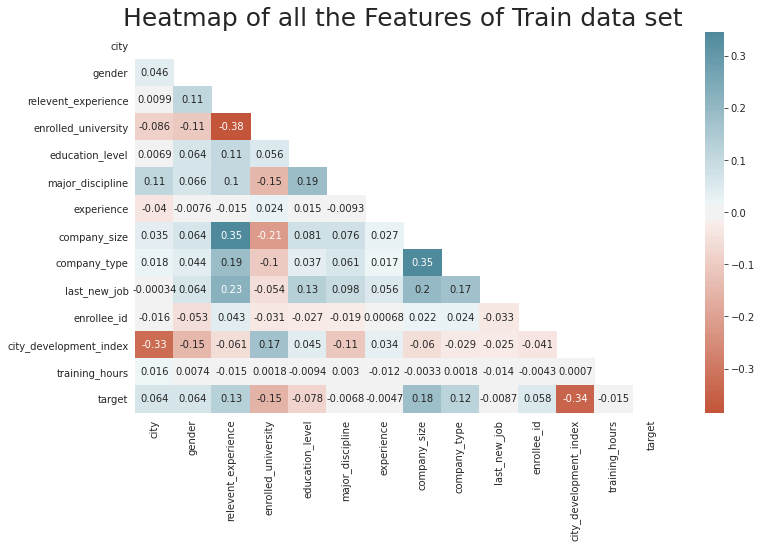

In [40]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

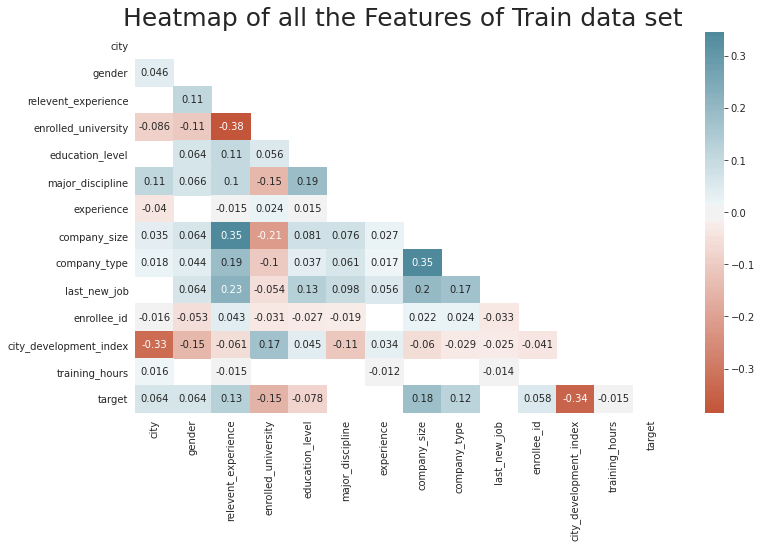

In [41]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_train.corr()
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

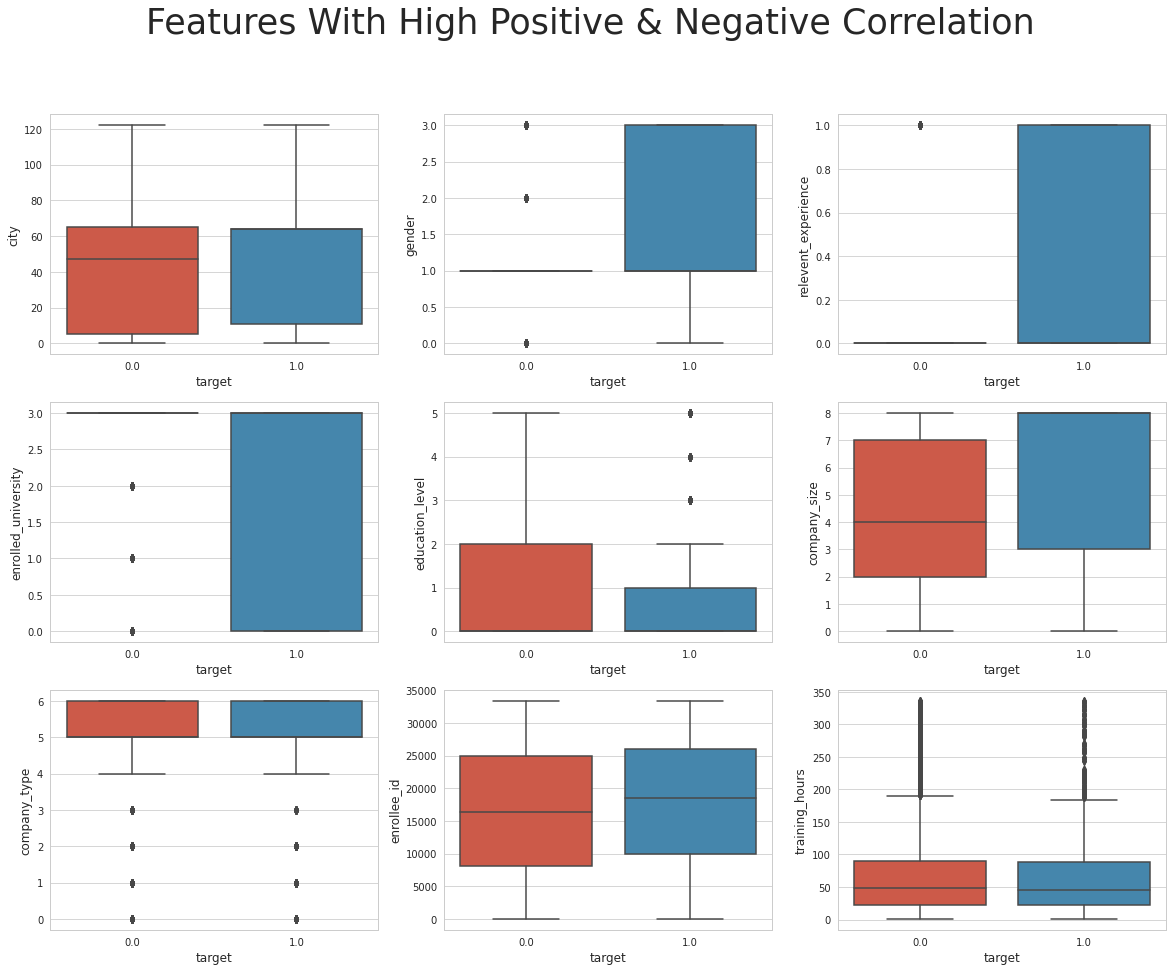

In [42]:
#visualizing the features whigh positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

f.suptitle('Features With High Positive & Negative Correlation', size=35)
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0,0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0,1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0,2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1,0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1,1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1,2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2,0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2,1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2,2])

In [43]:
ftrain = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours', 'target']
ftest = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours']

def Definedata():
    # define dataset
    data2=df_train[ftrain]
    X=data2.drop(columns=['target']).values
    y=data2['target'].values
    return X, y
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [44]:
def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [45]:
def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [46]:
def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [47]:
# Modeling
# ......................

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import seaborn 
import matplotlib.pyplot as plt

In [49]:
# define methods
#...................

In [50]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career swith = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
    g2.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
    g3.set_ylabel('Total career swith = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

def Featureimportances(models):
    model = models
    model.fit(X_train1,y_train1)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

In [51]:
X_train1, X_test1, y_train1, y_test1 = SMOTE()
X_train2, X_test2, y_train2, y_test2 = BSMOTE()
X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
X_train4, X_test4, y_train4, y_test4 = ADASYN()

Counter({0.0: 10065, 1.0: 3345})


AttributeError: 'SMOTE' object has no attribute 'fit_sample'